# New Section

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!unzip /gdrive/MyDrive/archive.zip

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, MaxPooling2D, Dense, Flatten
%matplotlib inline

In [4]:
classifier = Sequential()

classifier.add(Convolution2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)))
classifier.add(MaxPooling2D(2,2))

classifier.add(Convolution2D(100, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Flatten())
classifier.add(Dropout(0.5))

classifier.add(Dense(50, activation='relu'))
classifier.add(Dense(4, activation='softmax'))

In [5]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)            0         
                                                                 
 dropout (Dropout)           (None, 129600)            0

In [6]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory('/content/Training', 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('/content/Testing', 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [8]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [9]:
history = classifier.fit(train_generator,
                                   epochs=10,
                                   validation_data=validation_generator,
                                   callbacks=[checkpoint],)

Epoch 1/10
572/572 [==============================] - ETA: 0s - loss: 0.2397 - accuracy: 0.8078

572/572 [==============================] - 122s 211ms/step - loss: 0.2397 - accuracy: 0.8078 - val_loss: 0.1765 - val_accuracy: 0.8642
Epoch 2/10
572/572 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 0.9223

572/572 [==============================] - 119s 207ms/step - loss: 0.1100 - accuracy: 0.9223 - val_loss: 0.1308 - val_accuracy: 0.8963
Epoch 3/10
572/572 [==============================] - ETA: 0s - loss: 0.0692 - accuracy: 0.9531

572/572 [==============================] - 119s 208ms/step - loss: 0.0692 - accuracy: 0.9531 - val_loss: 0.0932 - val_accuracy: 0.9344
Epoch 4/10
572/572 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9741

572/572 [==============================] - 119s 208ms/step - loss: 0.0435 - accuracy: 0.9741 - val_loss: 0.0807 - val_accuracy: 0.9512
Epoch 5/10
572/572 [==============================] - 118s 206ms/step - loss: 0.0240 - accuracy: 0.9851 - val_loss: 0.0923 - val_accuracy: 0.9504
Epoch 6/10
572/572 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9888

572/572 [==============================] - 119s 208ms/step - loss: 0.0214 - accuracy: 0.9888 - val_loss: 0.0778 - val_accuracy: 0.9611
Epoch 7/10
572/572 [==============================] - 117s 205ms/step - loss: 0.0185 - accuracy: 0.9895 - val_loss: 0.0999 - val_accuracy: 0.9550
Epoch 8/10
572/572 [==============================] - 117s 205ms/step - loss: 0.0171 - accuracy: 0.9911 - val_loss: 0.1093 - val_accuracy: 0.9596
Epoch 9/10
572/572 [==============================] - 117s 205ms/step - loss: 0.0094 - accuracy: 0.9946 - val_loss: 0.1124 - val_accuracy: 0.9596
Epoch 10/10
572/572 [==============================] - 117s 205ms/step - loss: 0.0162 - accuracy: 0.9919 - val_loss: 0.1068 - val_accuracy: 0.9596


Text(0.5, 1.0, 'Accuracy Curve')

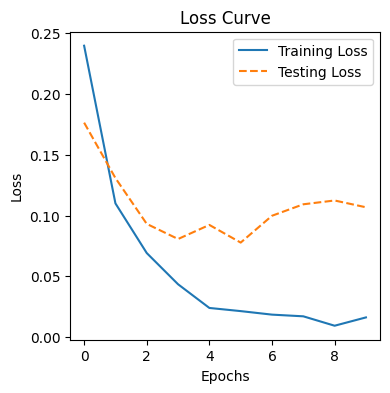

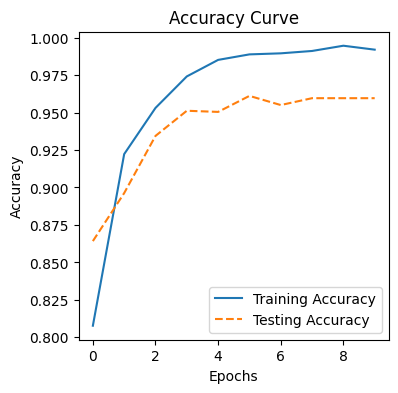

In [10]:
plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy Curves
plt.figure(figsize=(4,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")

In [29]:
classifier.evaluate(validation_generator)

132/132 [==============================] - 5s 36ms/step - loss: 0.1068 - accuracy: 0.9596


[0.10682976245880127, 0.9595728516578674]

In [12]:
classifier.save('mymodel.h5')

In [32]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Testing/glioma/Te-glTr_0007.jpg', target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
result
temp = np.argmax(result)
if temp==0:
  print("tumor1")
elif temp==1:
  print("tumor 2")
elif temp==2:
  print("No tumor")
elif temp==3:
  print("Tumor 4")

1/1 [==============================] - 0s 133ms/step
tumor1


In [33]:
print(result)
print(result.shape)
type(result)

[[1.0000000e+00 2.4548202e-20 3.0384630e-21 3.6247087e-21]]
(1, 4)


numpy.ndarray